In [3]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [4]:
import tensorflow as tf

### Parsing sound data

In [7]:
def parse_sounds(path):
    S, features, labels = [], np.empty((0,3360)), np.empty(0)
    for filename in os.listdir(path):
        if filename.startswith(""):
            X, sample_rate = librosa.load(path+filename) 
            
            spectr = librosa.feature.melspectrogram(X, sr=sample_rate)
            
            S.append(spectr)
            
            mfcc = extract_sound_features(X, sample_rate)
            
                        
            features = np.vstack([features,mfcc])  
                        
            label = filename.split(".")[0].split("_")[1]
            labels = np.append(labels, label)
            
    return S, np.array(features), np.array(labels, dtype = np.int)

def extract_sound_features(X, sample_rate):
    mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).flatten()
    mfcc = np.pad(mfcc, (0, 3360-len(mfcc)), "minimum")
    
    return mfcc

In [8]:
path = "C:/Neat/Study/диплом/data/ready/"

S, X, y = parse_sounds(path)

Mel-scaled рower spectrograms for "один"


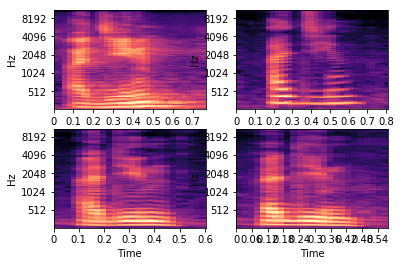

In [9]:
print('Mel-scaled рower spectrograms for "один"')
plt.subplot(2, 2, 1)
librosa.display.specshow(librosa.power_to_db(S[0], ref=np.max), y_axis='mel', x_axis='time')

plt.subplot(2, 2, 2)
librosa.display.specshow(librosa.power_to_db(S[50], ref=np.max), y_axis='mel', x_axis='time')

plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.power_to_db(S[100], ref=np.max), y_axis='mel', x_axis='time')

plt.subplot(2, 2, 4)
librosa.display.specshow(librosa.power_to_db(S[150], ref=np.max), y_axis='mel', x_axis='time')

plt.show()

### Splitting data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=100, 
                                                    random_state=42, 
                                                    stratify=y)

In [11]:
S_train, S_test, y_train, y_test = train_test_split(S, y,
                                                    test_size=100, 
                                                    random_state=42, 
                                                    stratify=y)

### Baseline models (trained on mfcc feature)

In [12]:
c = RandomForestClassifier(random_state=42, 
                           n_estimators=500)

print("cross-val score", cross_val_score(c, X, y).mean())

cross-val score 0.145925925926


In [13]:
clf = RandomForestClassifier(random_state=42, 
                             n_estimators=500)

clf.fit(X_train, y_train)

results = clf.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, results))

# for label, result in sorted(zip(y_test, results), key=lambda x: x[0]):
#     if label == result:
#         print(label, "\t", result, "\t", "+")
#     else:
#         print(label, "\t", result)

accuracy 0.15


In [29]:
c = svm.SVC(kernel="poly")

print("cross-val score", cross_val_score(c, X, y).mean())

cross-val score 0.16


In [51]:
clf = svm.SVC(kernel="poly")

clf.fit(X_train, y_train)

results = clf.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, results))

for label, result in sorted(zip(y_test, results), key=lambda x: x[0]):
    if label == result:
        print(label, "\t", result, "\t", "+")
    else:
        print(label, "\t", result)

accuracy 0.26
1 	 1 	 +
1 	 17
2 	 2 	 +
2 	 44
3 	 20
3 	 3 	 +
4 	 34
4 	 3
5 	 5 	 +
5 	 2
6 	 9
6 	 9
7 	 4
7 	 7 	 +
8 	 8 	 +
8 	 8 	 +
9 	 8
9 	 10
10 	 9
10 	 30
11 	 35
11 	 13
12 	 20
12 	 13
13 	 18
13 	 13 	 +
14 	 19
14 	 14 	 +
15 	 10
15 	 13
16 	 19
16 	 11
17 	 18
17 	 16
18 	 28
18 	 29
19 	 44
19 	 14
20 	 5
20 	 12
21 	 33
21 	 21 	 +
22 	 32
22 	 32
23 	 23 	 +
23 	 19
24 	 27
24 	 41
25 	 35
25 	 27
26 	 26 	 +
26 	 26 	 +
27 	 24
27 	 24
28 	 28 	 +
28 	 11
29 	 49
29 	 18
30 	 16
30 	 3
31 	 37
31 	 32
32 	 29
32 	 22
33 	 33 	 +
33 	 33 	 +
34 	 33
34 	 44
35 	 37
35 	 36
36 	 4
36 	 10
37 	 37 	 +
37 	 31
38 	 28
38 	 34
39 	 38
39 	 36
40 	 7
40 	 16
41 	 41 	 +
41 	 37
42 	 42 	 +
42 	 42 	 +
43 	 48
43 	 45
44 	 49
44 	 49
45 	 45 	 +
45 	 48
46 	 46 	 +
46 	 36
47 	 34
47 	 46
48 	 48 	 +
48 	 48 	 +
49 	 49 	 +
49 	 16
50 	 50 	 +
50 	 8
